In [1]:
# this notebook will create a figure to compare our model's alluvial geometry outputs 
# to that of the global dataset found in Phillips et al., 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# start by importing phillips data (already filtered in Excel)
global_data = pd.read_excel('phillips_data_clean.xlsx')

In [4]:
# add dimensionless values to Phillips dataset

# some values
R = 2.65
g = 9.81

# add some columns
global_data['Nondim W'] = global_data['Width (m)']/global_data['D50 (m)']
global_data['Nondim D'] = global_data['Depth (m)']/global_data['D50 (m)']
global_data['Nondim Q'] = global_data['Discharge (m3/s)']/(np.sqrt(R * g * (global_data['D50 (m)']**5)))

In [5]:
# now add in values from alluvial geometry experiments excel workbook
experiments = pd.read_excel('sensitivity analysis runs.xlsx')

# and filter out experiments that haven't been completed yet
complete_experiments = experiments.dropna()

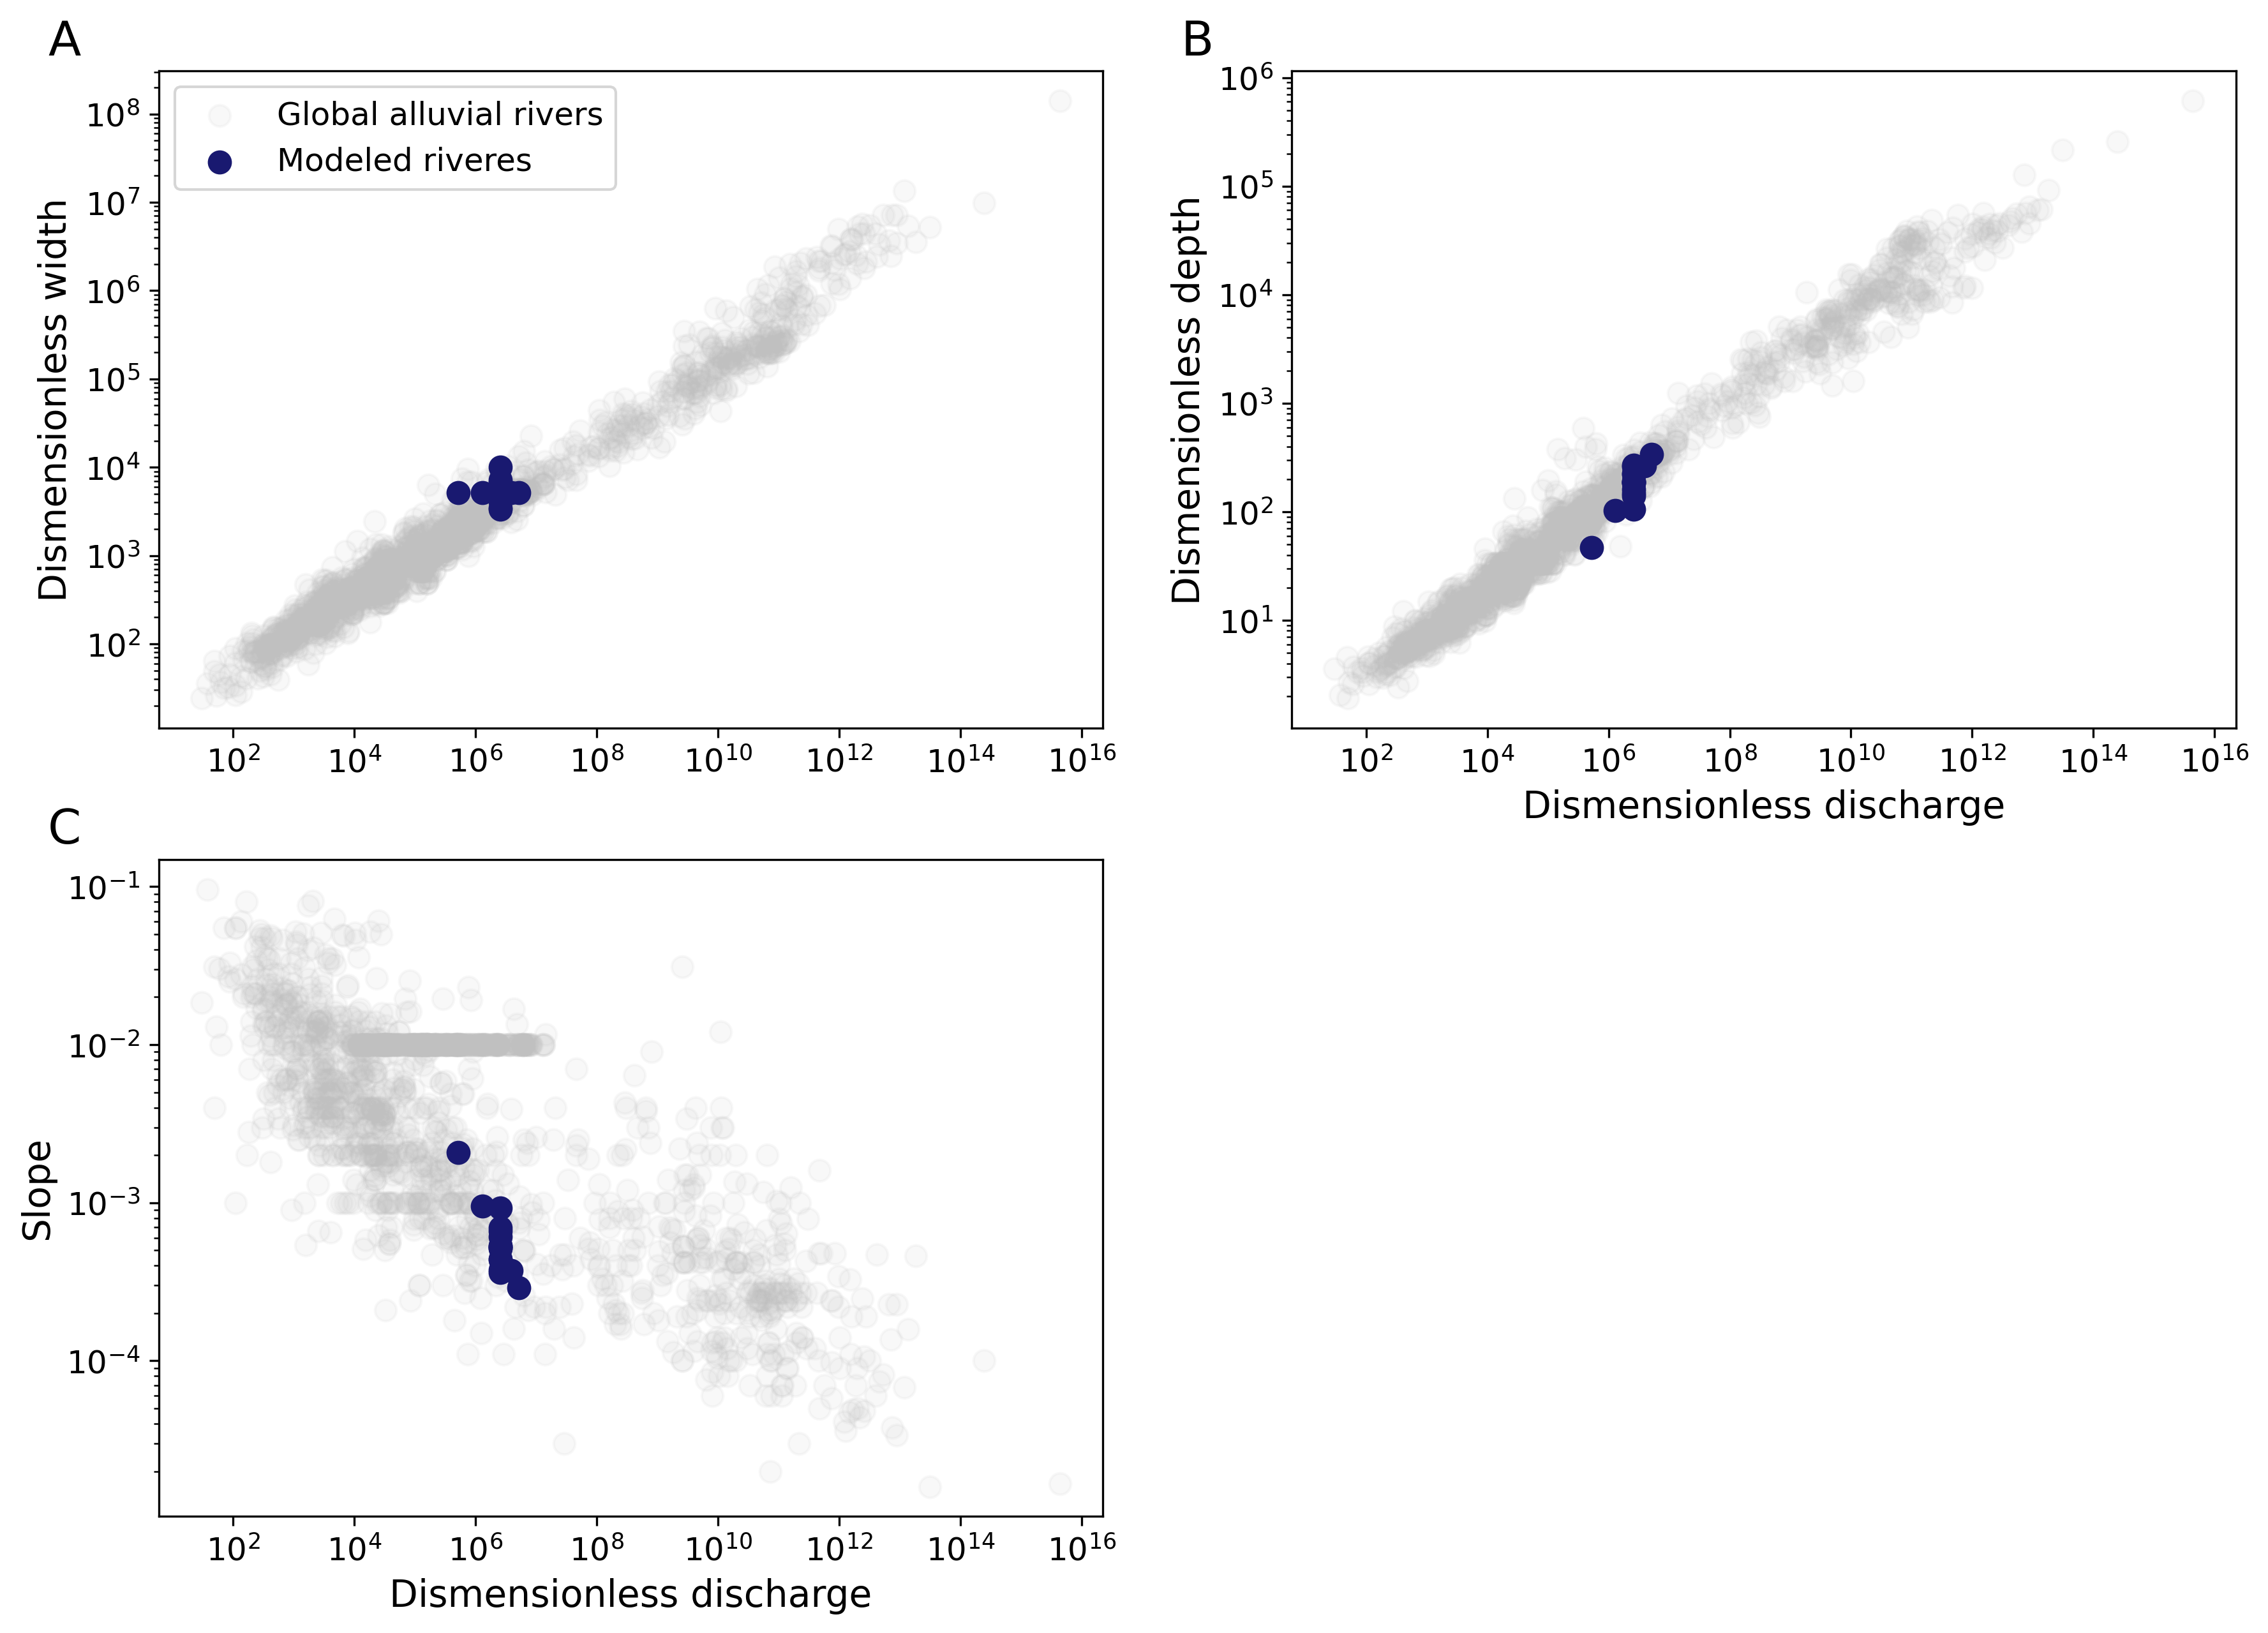

In [26]:
# great, now make a pretty figure

plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(2, 2, figsize = (14, 10), sharex = False, sharey = False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

axs[0, 0].scatter(global_data['Nondim Q'], global_data['Nondim W'], label = 'Global alluvial rivers', color = 'silver', alpha = 0.1, s = 65)
axs[0, 0].scatter(complete_experiments['Nondim Q'], complete_experiments['Nondim W'], label = 'Modeled riveres', color = 'midnightblue', s = 65)
# axs[0, 0].set_xlabel('Dismensionless discharge', fontsize = 14)
axs[0, 0].set_ylabel('Dismensionless width', fontsize = 14)
axs[0, 0].set_title('A', fontsize = 18, x=-0.1,y=1.0)
axs[0, 0].tick_params(axis="x", labelsize=12) 
axs[0, 0].tick_params(axis="y", labelsize=12)
axs[0, 0].legend(fontsize = 12)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

axs[0, 1].scatter(global_data['Nondim Q'], global_data['Nondim D'], color = 'silver', alpha = 0.1, s = 65)
axs[0, 1].scatter(complete_experiments['Nondim Q'], complete_experiments['Nondim D'], color = 'midnightblue', s = 65)
axs[0, 1].set_xlabel('Dismensionless discharge', fontsize = 14)
axs[0, 1].set_ylabel('Dismensionless depth', fontsize = 14)
axs[0, 1].set_title('B', fontsize = 18, x=-0.1,y=1.0)
axs[0, 1].tick_params(axis="x", labelsize=12) 
axs[0, 1].tick_params(axis="y", labelsize=12)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

axs[1, 0].scatter(global_data['Nondim Q'], global_data['Slope'], color = 'silver', alpha = 0.1, s = 65)
axs[1, 0].scatter(complete_experiments['Nondim Q'], complete_experiments['Slope'], color = 'midnightblue', s = 65)
axs[1, 0].set_xlabel('Dismensionless discharge', fontsize = 14)
axs[1, 0].set_ylabel('Slope', fontsize = 14)
axs[1, 0].set_title('C', fontsize = 18, x=-0.1,y=1.0)
axs[1, 0].tick_params(axis="x", labelsize=12) 
axs[1, 0].tick_params(axis="y", labelsize=12)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

axs[1,1].set_visible(False) 

plt.show()